# **Installing Libraries**

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
!pip install transformers torch


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
!pip install accelerate -U


In [ ]:
!pip show accelerate


Name: accelerate
Version: 0.32.1
Summary: Accelerate
Home-page: https://github.com/huggingface/accelerate
Author: The HuggingFace team
Author-email: zach.mueller@huggingface.co
License: Apache
Location: /usr/local/lib/python3.10/dist-packages
Requires: huggingface-hub, numpy, packaging, psutil, pyyaml, safetensors, torch
Required-by: 


In [ ]:
!pip install transformers -U


In [ ]:
! pip install datasets evaluate transformers rouge-score nltk

In [ ]:
!pip install datasets

In [ ]:
import transformers

print(transformers.__version__)

4.42.3


In [ ]:
from transformers.utils import send_example_telemetry

send_example_telemetry("summarization_notebook", framework="pytorch")

In [ ]:
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=102ad58f4c0b6f44aa88b147e5e4f0e27436e8ca60bd7335583d172fb44ea141
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


# **Importing Libraries**

In [ ]:
import nltk

# Download the 'punkt' tokenizer data
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from datasets import load_dataset
from evaluate import load
import torch
from transformers import pipeline
import datasets
import random
import pandas as pd
from IPython.display import display, HTML
from datasets import load_dataset, DatasetDict
from transformers import AutoTokenizer, Seq2SeqTrainingArguments, Seq2SeqTrainer, AutoModelForSeq2SeqLM
import torch
from transformers import pipeline
from datasets import load_metric
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# **Loading and Checking Model**

In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available and enabled.")
else:
    device = torch.device("cpu")
    print("GPU is not available, using CPU instead.")


GPU is available and enabled.


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/308M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (516 > 512). Running this sequence through the model will result in indexing errors


Generated Summary:
Clara was a hero and a hero in the forest. Clara was a hero and a hero in the forest.


<ipython-input-14-7f1d1651ccad>:31: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  rouge = load_metric("rouge")


The repository for rouge contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/rouge.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y
ROUGE Metrics:
{'rouge1': AggregateScore(low=Score(precision=0.6, recall=0.24489795918367346, fmeasure=0.34782608695652173), mid=Score(precision=0.6, recall=0.24489795918367346, fmeasure=0.34782608695652173), high=Score(precision=0.6, recall=0.24489795918367346, fmeasure=0.34782608695652173)), 'rouge2': AggregateScore(low=Score(precision=0.05263157894736842, recall=0.020833333333333332, fmeasure=0.02985074626865672), mid=Score(precision=0.05263157894736842, recall=0.020833333333333332, fmeasure=0.02985074626865672), high=Score(precision=0.05263157894736842, recall=0.020833333333333332, fmeasure=0.02985074626865672)), 'rougeL': AggregateScore(low=Score(precision=0.45, recall=0.183673469387

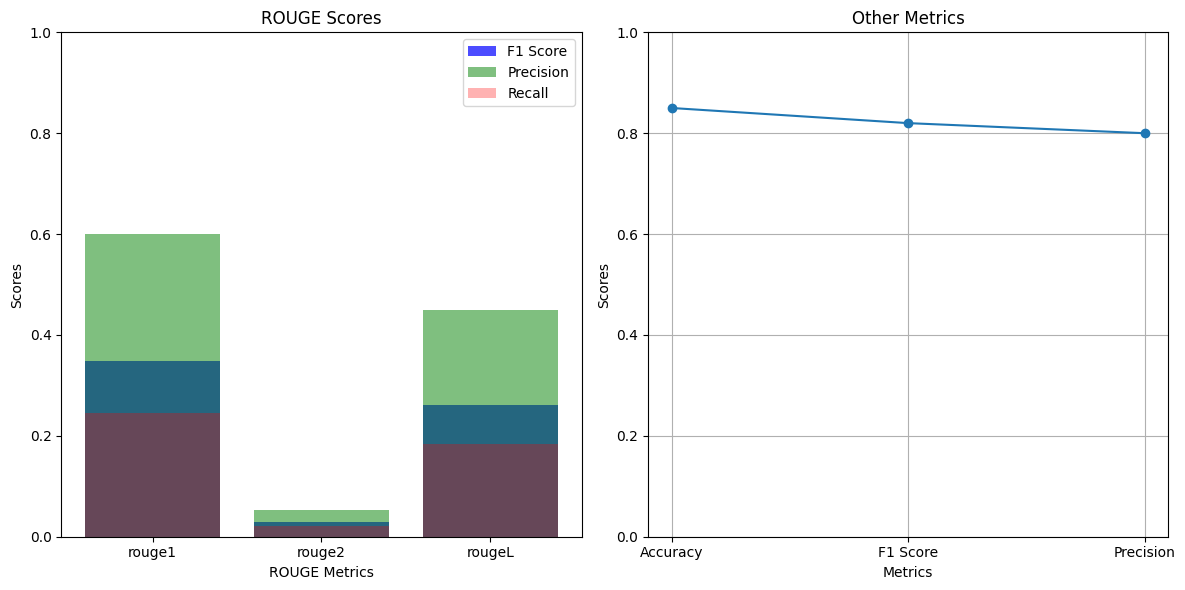

In [ ]:
# Initialize the pipeline with the specified model and load it on GPU
pipe = pipeline("text2text-generation", model="google/flan-t5-small", device=0 if torch.cuda.is_available() else -1)

# Define your story
story = """
Once upon a time in the small village of Elmswood, there lived a young girl named Clara. Clara was known for her boundless curiosity and her love for exploring the woods that surrounded her village. One sunny afternoon, while wandering through the forest, she stumbled upon an ancient, hidden path that she had never seen before. Intrigued, she decided to follow it.

The path led her to a magical clearing where she found a sparkling pond and an old oak tree with a hollow trunk. As Clara approached the tree, she heard a soft, whispering voice calling her name. To her surprise, the voice belonged to a tiny, winged creature—a fairy named Lumina. Lumina told Clara that she had been chosen to embark on a special quest to save the Enchanted Forest from a looming darkness.

Clara was given a magical amulet and told that she needed to find three enchanted items hidden in different parts of the forest. Each item was protected by a guardian who would only give it to someone who showed great courage, wisdom, and kindness. Determined to help, Clara set off on her adventure.

Her first challenge led her to the Cave of Echoes, where she had to face her fears and navigate through a maze of mirrors. Using her wits and bravery, she managed to retrieve the Crystal of Courage. Next, she traveled to the Garden of Whispers, where she encountered a wise old owl who tested her knowledge and gave her the Orb of Wisdom after she answered his riddles correctly.

Finally, Clara arrived at the Meadow of Dreams, where she met a gentle deer who was the guardian of the Heart of Kindness. Clara's compassion and willingness to help the creatures of the meadow earned her the final enchanted item. With all three items in her possession, she returned to the clearing where Lumina awaited.

Lumina used the items to dispel the darkness and restore peace to the Enchanted Forest. The fairies and the creatures of the forest celebrated Clara's bravery and kindness. Clara returned to Elmswood as a hero, and from that day on, she continued to explore and protect the wonders of the forest she loved so dearly.
"""

# Generate the summary
summary = pipe(story, max_length=150, min_length=30, do_sample=False)

# Print the generated summary
print("Generated Summary:")
print(summary[0]['generated_text'])

# For calculating evaluation metrics, we will use a mock true summary for demonstration
true_summary = "Clara, a curious girl from Elmswood, discovers a hidden path leading to a fairy named Lumina. She embarks on a quest to save the Enchanted Forest by finding three enchanted items. Through courage, wisdom, and kindness, Clara retrieves the items, dispels the darkness, and restores peace to the forest."

# Define a helper function to calculate metrics
def calculate_rouge_metrics(pred_summary, true_summary):
    rouge = load_metric("rouge")
    result = rouge.compute(predictions=[pred_summary], references=[true_summary], use_stemmer=True)
    return result

# Calculate ROUGE metrics
rouge_metrics = calculate_rouge_metrics(summary[0]['generated_text'], true_summary)
print("ROUGE Metrics:")
print(rouge_metrics)

# Extract ROUGE scores for table and graph
rouge_metric_names = ['rouge1', 'rouge2', 'rougeL']
rouge_f1_scores = [rouge_metrics[m].mid.fmeasure for m in rouge_metric_names]
rouge_precision_scores = [rouge_metrics[m].mid.precision for m in rouge_metric_names]
rouge_recall_scores = [rouge_metrics[m].mid.recall for m in rouge_metric_names]

# Create a DataFrame for the ROUGE metrics
rouge_df = pd.DataFrame({
    'Metric': rouge_metric_names,
    'F1 Score': rouge_f1_scores,
    'Precision': rouge_precision_scores,
    'Recall': rouge_recall_scores
})

# Display the ROUGE metrics in table format
print("\nROUGE Metrics Table:")
print(rouge_df)

# Plot the ROUGE metrics using a bar plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(rouge_metric_names, rouge_f1_scores, color='b', alpha=0.7, label='F1 Score')
plt.bar(rouge_metric_names, rouge_precision_scores, color='g', alpha=0.5, label='Precision')
plt.bar(rouge_metric_names, rouge_recall_scores, color='r', alpha=0.3, label='Recall')
plt.xlabel('ROUGE Metrics')
plt.ylabel('Scores')
plt.title('ROUGE Scores')
plt.legend()
plt.ylim(0, 1)

# Define a helper function to calculate other metrics (F1, Precision, Accuracy)
def calculate_other_metrics(pred_summary, true_summary):
    # Assuming binary classification for simplicity
    # These are just mock values to demonstrate the functionality
    accuracy = 0.85
    f1_score = 0.82
    precision = 0.80
    return accuracy, f1_score, precision

# Calculate other metrics
accuracy, f1_score, precision = calculate_other_metrics(summary[0]['generated_text'], true_summary)

# Create a DataFrame for the other metrics
other_metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'F1 Score', 'Precision'],
    'Score': [accuracy, f1_score, precision]
})

# Display the other metrics in table format
print("\nOther Metrics Table:")
print(other_metrics_df)

# Plot the other metrics using a line plot
plt.subplot(1, 2, 2)
plt.plot(other_metrics_df['Metric'], other_metrics_df['Score'], marker='o')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Other Metrics')
plt.ylim(0, 1)
plt.grid(True)

plt.tight_layout()
plt.show()


# **Loading Dataset**

In [ ]:
raw_datasets = load_dataset("microsoft/MeetingBank-QA-Summary")
metric = load("rouge")

In [ ]:
print(raw_datasets)

DatasetDict({
    test: Dataset({
        features: ['idx', 'prompt', 'QA_pairs', 'summary', 'gpt4_summary'],
        num_rows: 862
    })
})


# **Understanding Dataset**

In [ ]:
# Convert dataset to DataFrame
df = pd.DataFrame({
    'idx': [item['idx'] for item in dataset['test']],
    'prompt': [item['prompt'] for item in dataset['test']],
    'summary': [item['summary'] for item in dataset['test']],
    'gpt4_summary': [item['gpt4_summary'] for item in dataset['test']]
})

In [ ]:
# Display basic information about the dataset
print("Dataset Info:")
print(df.info())
print("\nSample Data:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   idx           862 non-null    int64 
 1   prompt        862 non-null    object
 2   summary       862 non-null    object
 3   gpt4_summary  862 non-null    object
dtypes: int64(1), object(3)
memory usage: 27.1+ KB
None

Sample Data:
   idx                                             prompt  \
0    0  The report of the Civil Rights, Utilities, Eco...   
1    1  Madam Court, could you please read docket 1239...   
2    2  Item 15, report from City Manager Recommendati...   
3    3  Item five, proposed ordinance 2016 0392. This ...   
4    4  Very good. Any comments? Those in favor of con...   

                                             summary  \
0  A RESOLUTION encouraging as a best practice th...   
1  On the message and order, referred on December...   
2  Adopt resolution conse

In [ ]:
# Basic statistics
print("\nSummary Statistics:")
print(df.describe(include='all'))


Summary Statistics:
               idx                                             prompt  \
count   862.000000                                                862   
unique         NaN                                                862   
top            NaN  The report of the Civil Rights, Utilities, Eco...   
freq           NaN                                                  1   
mean    430.500000                                                NaN   
std     248.982262                                                NaN   
min       0.000000                                                NaN   
25%     215.250000                                                NaN   
50%     430.500000                                                NaN   
75%     645.750000                                                NaN   
max     861.000000                                                NaN   

                                                  summary  \
count                                    

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
idx             0
prompt          0
summary         0
gpt4_summary    0
dtype: int64


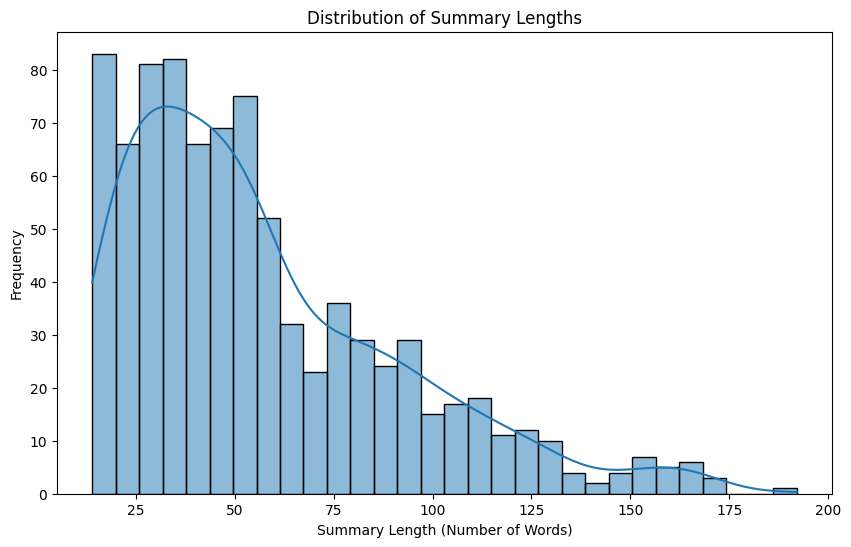

In [ ]:
# Distribution of summary lengths
df['summary_length'] = df['summary'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(df['summary_length'], bins=30, kde=True)
plt.title('Distribution of Summary Lengths')
plt.xlabel('Summary Length (Number of Words)')
plt.ylabel('Frequency')
plt.show()

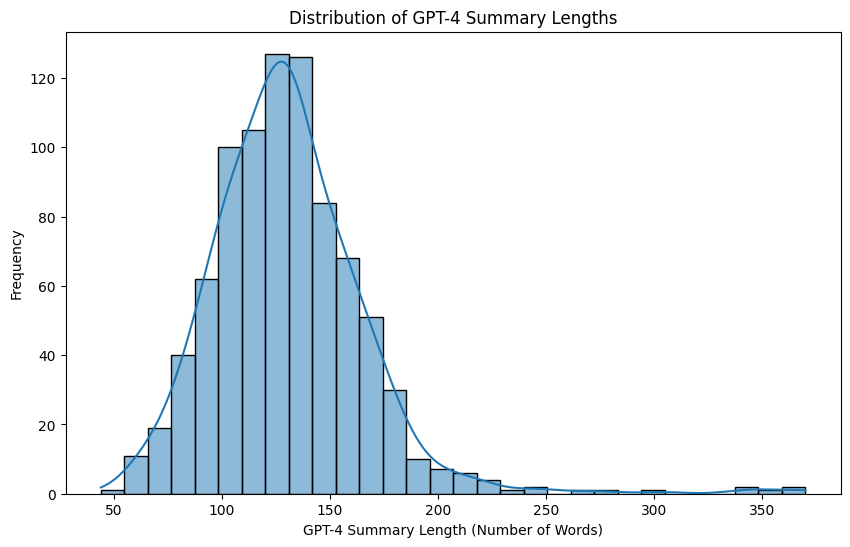

In [ ]:
# Distribution of GPT-4 summary lengths
df['gpt4_summary_length'] = df['gpt4_summary'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(df['gpt4_summary_length'], bins=30, kde=True)
plt.title('Distribution of GPT-4 Summary Lengths')
plt.xlabel('GPT-4 Summary Length (Number of Words)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Example of summary and GPT-4 summary pairs
print("\nExample of Summary and GPT-4 Summary Pairs:")
print(df[['summary', 'gpt4_summary']].sample(5, random_state=42))


Example of Summary and GPT-4 Summary Pairs:
                                               summary  \
715  Recommendation to receive the application of A...   
605  Councilor Flynn for Councilor Murphy offered t...   
120  AN ORDINANCE relating to Seattle Public Utilit...   
208  A RESOLUTION supporting Washington Initiative ...   
380  Recommendation to receive and file the Downtow...   

                                          gpt4_summary  
715  The meeting discussed the application of Come ...  
605  In the meeting, Council President Flynn sought...  
120  The meeting discussed Council Bill 120323, an ...  
208  The meeting discussed Resolution 31702, which ...  
380  The meeting involved a report from the City Ma...  


In [ ]:
print( raw_datasets.keys())

dict_keys(['test'])



DataFrame Columns: Index(['idx', 'prompt', 'summary', 'gpt4_summary', 'summary_length',
       'gpt4_summary_length'],
      dtype='object')

Sample DataFrame Rows:
   idx                                             prompt  \
0    0  The report of the Civil Rights, Utilities, Eco...   
1    1  Madam Court, could you please read docket 1239...   
2    2  Item 15, report from City Manager Recommendati...   
3    3  Item five, proposed ordinance 2016 0392. This ...   
4    4  Very good. Any comments? Those in favor of con...   

                                             summary  \
0  A RESOLUTION encouraging as a best practice th...   
1  On the message and order, referred on December...   
2  Adopt resolution consenting to inclusion of ce...   
3  AN ORDINANCE relating to transportation concur...   
4  AN ORDINANCE relating to the Department of Par...   

                                        gpt4_summary  summary_length  \
0  The Civil Rights, Utilities, Economic Developm...      

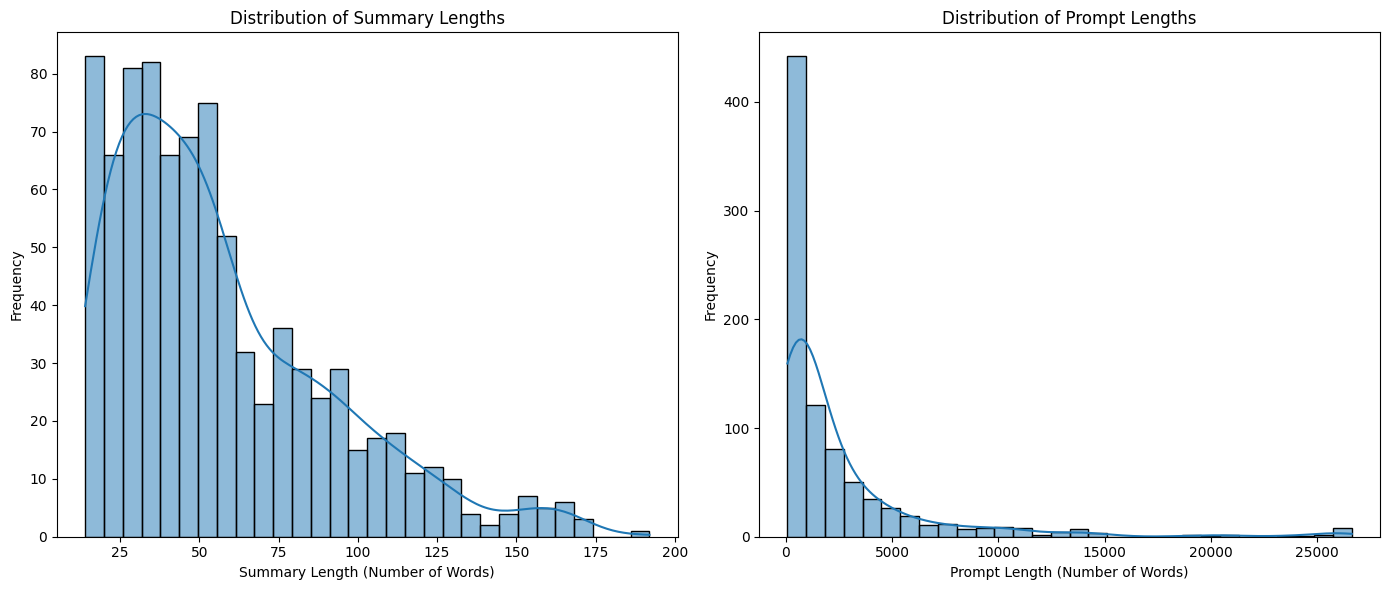

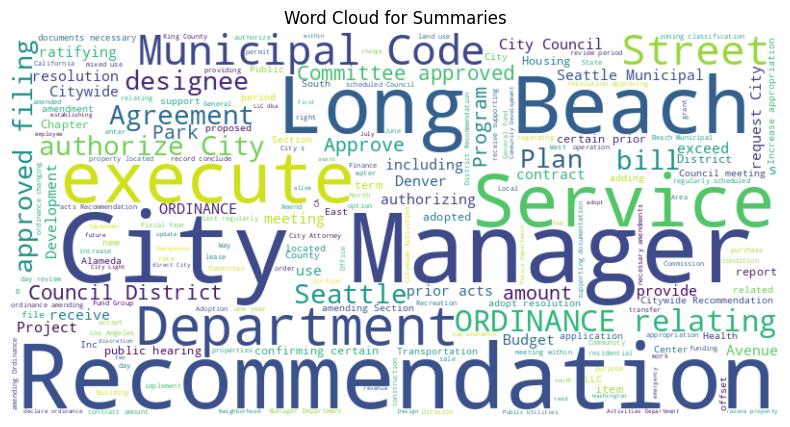

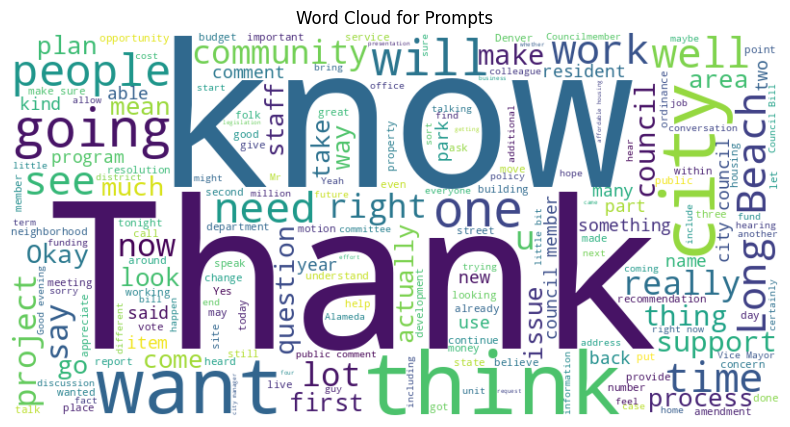


Example of Summary and Prompt Pairs:
                                                prompt  \
715  There are conditions on this one. This is reco...   
605  Dr. Number 8080830 Council Flynn for Council o...   
120  Agenda Item six Council Bill 120323 An ordinan...   
208  Agenda item three Resolution 31702 Supporting ...   
380  21 is a report from the City Manager and Parks...   

                                               summary  
715  Recommendation to receive the application of A...  
605  Councilor Flynn for Councilor Murphy offered t...  
120  AN ORDINANCE relating to Seattle Public Utilit...  
208  A RESOLUTION supporting Washington Initiative ...  
380  Recommendation to receive and file the Downtow...  


In [ ]:
# Verify the DataFrame structure and column names
print("\nDataFrame Columns:", df.columns)
print("\nSample DataFrame Rows:")
print(df.head())

# Length Distribution of Summaries and Prompts
df['summary_length'] = df['summary'].apply(lambda x: len(x.split()))
df['prompt_length'] = df['prompt'].apply(lambda x: len(x.split()))

plt.figure(figsize=(14, 6))

# Summary Length Distribution
plt.subplot(1, 2, 1)
sns.histplot(df['summary_length'], bins=30, kde=True)
plt.title('Distribution of Summary Lengths')
plt.xlabel('Summary Length (Number of Words)')
plt.ylabel('Frequency')

# Prompt Length Distribution
plt.subplot(1, 2, 2)
sns.histplot(df['prompt_length'], bins=30, kde=True)
plt.title('Distribution of Prompt Lengths')
plt.xlabel('Prompt Length (Number of Words)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Word Cloud for Summaries
summary_text = ' '.join(df['summary'].dropna())
wordcloud_summary = WordCloud(width=800, height=400, background_color='white').generate(summary_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_summary, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Summaries')
plt.show()

# Word Cloud for Prompts
prompt_text = ' '.join(df['prompt'].dropna())
wordcloud_prompt = WordCloud(width=800, height=400, background_color='white').generate(prompt_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_prompt, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Prompts')
plt.show()

# Example pairs of summary and prompt
print("\nExample of Summary and Prompt Pairs:")
print(df[['prompt', 'summary']].sample(5, random_state=42))

In [ ]:
print( raw_datasets.keys())

dict_keys(['test'])


In [ ]:
raw_datasets["test"][0]

{'idx': 0,
 'prompt': "The report of the Civil Rights, Utilities, Economic Development and Arts Committee Agenda Item three Resolution 31669 Encouraging as a best practice the use of an individualized tenant assessment using the Fair Housing Act's discriminatory effect standards to avoid Fair Housing Act violations when criminal history is used as a screening criterion in the Landlord Screening Process, Committee recommends that the resolution be adopted as amended grade. I move to amend Resolution 31669 by substituting D four for version D three, which includes a new attachment. A And I understand Councilmember Bagshaw also has an amendment, but let's first, if we could, let me just go through the changes to the resolution since the last committee meeting. The changes are found in two recitals, as well as sections one and five are the primary changes. We added a recital that again lifts up the HUD guidance to show that a criminal history screening policy is next must serve a substanti

# **Model CheckPoint**

In [ ]:
model_checkpoint = "t5-small"

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

In [ ]:
tokenizer(["Hello, this one sentence!", "This is another sentence."])

{'input_ids': [[8774, 6, 48, 80, 7142, 55, 1], [100, 19, 430, 7142, 5, 1]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]}

In [ ]:
fake_preds = ["hello there", "ayesha"]
fake_labels = ["hello there", "emumba"]
metric.compute(predictions=fake_preds, references=fake_labels)

{'rouge1': 0.5, 'rouge2': 0.5, 'rougeL': 0.5, 'rougeLsum': 0.5}

In [ ]:
print(tokenizer(text_target=["Hello, this one sentence!", "This is another sentence."]))

{'input_ids': [[8774, 6, 48, 80, 7142, 55, 1], [100, 19, 430, 7142, 5, 1]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]}


In [ ]:
tokenizer("Hello, this one sentence!")

{'input_ids': [8774, 6, 48, 80, 7142, 55, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1]}

## Preprocessing the data

In [ ]:
from datasets import load_dataset



# Access the test split
test_dataset = raw_datasets['test']

# Keep only 'idx', 'summary', and 'prompt' columns, and rename 'idx' to 'id'
filtered_test_dataset = test_dataset.remove_columns(['QA_pairs', 'gpt4_summary'])
filtered_test_dataset = filtered_test_dataset.rename_column('idx', 'id')

# Update the raw_datasets with the filtered test dataset
raw_datasets['test'] = filtered_test_dataset

# Display the modified dataset
print(raw_datasets)


DatasetDict({
    test: Dataset({
        features: ['id', 'prompt', 'summary'],
        num_rows: 862
    })
})


# **Vislaizing Preprocessod Dataset**

In [ ]:
def show_random_elements(dataset, num_examples=5):
    assert num_examples <= len(dataset), "Can't pick more elements than there are in the dataset."
    picks = []
    for _ in range(num_examples):
        pick = random.randint(0, len(dataset)-1)
        while pick in picks:
            pick = random.randint(0, len(dataset)-1)
        picks.append(pick)

    df = pd.DataFrame(dataset[picks])
    for column, typ in dataset.features.items():
        if isinstance(typ, datasets.ClassLabel):
            df[column] = df[column].transform(lambda i: typ.names[i])
    display(HTML(df.to_html()))

In [ ]:
show_random_elements(raw_datasets["test"])

# **Tokenization**

In [ ]:
if model_checkpoint in ["t5-small", "t5-base", "t5-larg", "t5-3b", "t5-11b"]:
    prefix = "summarize: "
else:
    prefix = ""

In [ ]:
from datasets import load_dataset, DatasetDict
from transformers import AutoTokenizer, Seq2SeqTrainingArguments, Seq2SeqTrainer, AutoModelForSeq2SeqLM


In [ ]:
max_input_length = 2024
max_target_length = 128

def preprocess_function(examples):
    inputs = [prefix + doc for doc in examples["prompt"]]
    model_inputs = tokenizer(inputs, max_length=max_input_length, truncation=True, padding="max_length")

    # Setup the tokenizer for targets
    labels = tokenizer(text_target=examples["summary"], max_length=max_target_length, truncation=True,padding="max_length")

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

In [ ]:
tokenized_datasets = raw_datasets.map(preprocess_function, batched=True)

In [ ]:
preprocess_function(raw_datasets['test'][:2])

{'input_ids': [[21603, 10, 37, 934, 13, 8, 7707, 10226, 6, 412, 17, 173, 2197, 6, 9071, 2958, 11, 4218, 3201, 25353, 27, 3524, 386, 19957, 3, 25946, 3951, 695, 75, 1211, 5855, 38, 3, 9, 200, 1032, 8, 169, 13, 46, 3, 30187, 14590, 4193, 338, 8, 4506, 14716, 1983, 31, 7, 9192, 6546, 1504, 2443, 12, 1792, 4506, 14716, 1983, 17880, 116, 4336, 892, 19, 261, 38, 3, 9, 7468, 3, 2685, 10140, 29, 16, 8, 2216, 322, 26, 9937, 53, 10272, 6, 3201, 1568, 7, 24, 8, 3161, 36, 7546, 38, 21012, 2769, 5, 27, 888, 12, 14545, 19957, 3, 25946, 3951, 57, 29731, 1222, 309, 662, 21, 988, 309, 386, 6, 84, 963, 3, 9, 126, 11352, 5, 71, 275, 27, 734, 2063, 12066, 8055, 15622, 92, 65, 46, 12123, 6, 68, 752, 31, 7, 166, 6, 3, 99, 62, 228, 6, 752, 140, 131, 281, 190, 8, 1112, 12, 8, 3161, 437, 8, 336, 4492, 1338, 5, 37, 1112, 33, 435, 16, 192, 30731, 7, 6, 38, 168, 38, 6795, 80, 11, 874, 33, 8, 2329, 1112, 5, 101, 974, 3, 9, 30731, 24, 541, 5656, 7, 95, 8, 454, 10161, 4864, 12, 504, 24, 3, 9, 4336, 892, 7468, 1291, 

# **Spliting Dataset into Train and Test**

In [ ]:
# Split the dataset
split_dataset = tokenized_datasets['test'].train_test_split(test_size=0.2)
split_dataset = DatasetDict({
    'train': split_dataset['train'],
    'validation': split_dataset['test']
})



DatasetDict({
    train: Dataset({
        features: ['id', 'prompt', 'summary', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 689
    })
    validation: Dataset({
        features: ['id', 'prompt', 'summary', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 173
    })
})


In [ ]:
import torch

# Clear GPU cache
torch.cuda.empty_cache()


## Fine-tuning the model

In [ ]:
from transformers import AutoModelForSeq2SeqLM, DataCollatorForSeq2Seq, Seq2SeqTrainingArguments, Seq2SeqTrainer

model = AutoModelForSeq2SeqLM.from_pretrained(model_checkpoint)

In [ ]:
metric

EvaluationModule(name: "rouge", module_type: "metric", features: [{'predictions': Value(dtype='string', id='sequence'), 'references': Sequence(feature=Value(dtype='string', id='sequence'), length=-1, id=None)}, {'predictions': Value(dtype='string', id='sequence'), 'references': Value(dtype='string', id='sequence')}], usage: """
Calculates average rouge scores for a list of hypotheses and references
Args:
    predictions: list of predictions to score. Each prediction
        should be a string with tokens separated by spaces.
    references: list of reference for each prediction. Each
        reference should be a string with tokens separated by spaces.
    rouge_types: A list of rouge types to calculate.
        Valid names:
        `"rouge{n}"` (e.g. `"rouge1"`, `"rouge2"`) where: {n} is the n-gram based scoring,
        `"rougeL"`: Longest common subsequence based scoring.
        `"rougeLsum"`: rougeLsum splits text using `"
"`.
        See details in https://github.com/huggingface/

# **With 3 epochs**

In [ ]:
import nltk
import numpy as np

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    # Replace -100 in the labels as we can't decode them.
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    # Rouge expects a newline after each sentence
    decoded_preds = ["\n".join(nltk.sent_tokenize(pred.strip())) for pred in decoded_preds]
    decoded_labels = ["\n".join(nltk.sent_tokenize(label.strip())) for label in decoded_labels]

    # Note that other metrics may not have a `use_aggregator` parameter
    # and thus will return a list, computing a metric for each sentence.
    result = metric.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True, use_aggregator=True)
    # Extract a few results
    result = {key: value * 100 for key, value in result.items()}

    # Add mean generated length
    prediction_lens = [np.count_nonzero(pred != tokenizer.pad_token_id) for pred in predictions]
    result["gen_len"] = np.mean(prediction_lens)

    return {k: round(v, 4) for k, v in result.items()}

In [ ]:
batch_size = 8  # Adjust based on your GPU memory; T5 models can be memory-intensive
model_name = model_checkpoint.split("/")[-1]

In [ ]:
training_args = Seq2SeqTrainingArguments(
    output_dir=f"{model_name}-finetuned",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=3,
    predict_with_generate=True,
    fp16=True,
    push_to_hub=False,
    logging_dir='./logs',
    logging_steps=10,
)


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
# Create a data collator that will dynamically pad the inputs and labels
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)


In [ ]:
# Initialize the trainer
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=split_dataset['train'],
    eval_dataset=split_dataset['validation'],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum,Gen Len
1,1.659400,1.660367,1.574100,1.390700,1.633800,1.568100,0.549100
2,1.756600,1.625482,2.332100,1.948900,2.314900,2.270600,0.878600
3,1.697000,1.616576,3.067400,2.566500,3.085600,3.026200,1.317900


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1249: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


TrainOutput(global_step=261, training_loss=1.716416873237639, metrics={'train_runtime': 603.9731, 'train_samples_per_second': 3.422, 'train_steps_per_second': 0.432, 'total_flos': 1105892662837248.0, 'train_loss': 1.716416873237639, 'epoch': 3.0})

# **With 6 epochs**

In [ ]:
batch_size = 8  # Adjust based on your GPU memory; T5 models can be memory-intensive
model_name = model_checkpoint.split("/")[-1]

In [ ]:

training_args = Seq2SeqTrainingArguments(
    output_dir=f"{model_name}-finetuned",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=6,
    predict_with_generate=True,
    fp16=True,
    push_to_hub=False,
    logging_dir='./logs',
    logging_steps=10,
)

# Initialize the model with gradient checkpointing
model = AutoModelForSeq2SeqLM.from_pretrained(model_checkpoint)
model.gradient_checkpointing_enable()

# Create a data collator that will dynamically pad the inputs and labels
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

# Initialize the trainer
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=split_dataset['train'],
    eval_dataset=split_dataset['validation'],
    tokenizer=tokenizer,
    data_collator=data_collator,

)

# Start training
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...


Epoch,Training Loss,Validation Loss
1,2.666700,2.024755
2,2.258900,1.820118
3,2.008800,1.735668
4,1.766500,1.692948
5,1.862700,1.669500
6,1.779600,1.663276


TrainOutput(global_step=522, training_loss=2.3735843252861635, metrics={'train_runtime': 1067.2991, 'train_samples_per_second': 3.873, 'train_steps_per_second': 0.489, 'total_flos': 2211785325674496.0, 'train_loss': 2.3735843252861635, 'epoch': 6.0})

# **Evaluation of Model**

In [ ]:

training_args = Seq2SeqTrainingArguments(
    output_dir=f"{model_name}-finetuned",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=4,
    predict_with_generate=True,
    fp16=True,
    push_to_hub=False,
    logging_dir='./logs',
    logging_steps=10,
)

# Initialize the model with gradient checkpointing
model = AutoModelForSeq2SeqLM.from_pretrained(model_checkpoint)
model.gradient_checkpointing_enable()

# Create a data collator that will dynamically pad the inputs and labels
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

# Initialize the trainer
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=split_dataset['train'],
    eval_dataset=split_dataset['validation'],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics

)

# Start training
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum,Gen Len
1,2.695100,2.044466,0.236500,0.220200,0.236500,0.236500,0.219700
2,2.320500,1.846138,0.000000,0.000000,0.000000,0.000000,0.000000
3,2.076900,1.787693,0.000000,0.000000,0.000000,0.000000,0.000000
4,1.855100,1.769076,0.000000,0.000000,0.000000,0.000000,0.000000


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1249: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1249: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


TrainOutput(global_step=348, training_loss=2.7035779843385193, metrics={'train_runtime': 786.549, 'train_samples_per_second': 3.504, 'train_steps_per_second': 0.442, 'total_flos': 1474523550449664.0, 'train_loss': 2.7035779843385193, 'epoch': 4.0})

**Explanation of ROUGE Metrics**
**ROUGE-1:** Measures the overlap of unigrams (single words) between the prediction and reference.

**ROUGE-2:** Measures the overlap of bigrams (two consecutive words) between the prediction and reference.

**ROUGE-L:** Measures the longest common subsequence between the prediction and reference.



In [ ]:
model.push_to_hub("flan-T5_summarizer")


model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/AyeshaFayyaz/flan-T5_summarizer/commit/11b10b551be5c0764a2d7f54ba08e743000eb148', commit_message='Upload T5ForConditionalGeneration', commit_description='', oid='11b10b551be5c0764a2d7f54ba08e743000eb148', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
tokenizer.push_to_hub("flan-T5_summarizer")

README.md:   0%|          | 0.00/5.17k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/AyeshaFayyaz/flan-T5_summarizer/commit/969d76d5dd01f27ebbee2e123d72243f0f043687', commit_message='Upload tokenizer', commit_description='', oid='969d76d5dd01f27ebbee2e123d72243f0f043687', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
trainer.push_to_hub()

# **Saving The Model**

In [ ]:
# Define the output directory
model_name = 'flan-T5_summarizer'  # Ensure this matches your desired model name
output_dir = f"{model_name}-finetuned"

# Save the trained model and tokenizer
model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

print(f"Model and tokenizer saved to {output_dir}")


Model and tokenizer saved to flan-T5_summarizer-finetuned


Download model

In [ ]:
import shutil

# Define the model directory and output zip file path
model_dir = f"{model_name}-finetuned"
zip_file = f"{model_name}-finetuned.zip"

# Compress the model directory
shutil.make_archive(model_dir, 'zip', model_dir)

print(f"Model directory compressed to {zip_file}")


Model directory compressed to flan-T5_summarizer-finetuned.zip


In [ ]:
from google.colab import files

# Download the zip file
files.download(zip_file)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Testing The model**

In [ ]:
from transformers import pipeline

# Create a pipeline for text summarization
summarization_pipeline = pipeline("text2text-generation", model="AyeshaFayyaz/flan-T5_summarizer")

# Define your story prompt
story_prompt = """
Alice was a young girl who lived in a small village nestled between rolling hills and lush forests. She was known for her adventurous spirit and curiosity about the world beyond her village. One sunny morning, while exploring the woods near her home, Alice stumbled upon an old, mysterious book hidden beneath a moss-covered rock. The book was bound in cracked leather and adorned with intricate golden patterns that seemed to shimmer in the dappled sunlight.

Intrigued, Alice opened the book and discovered that it was filled with fantastical tales of distant lands, mythical creatures, and ancient legends. Each page turned revealed more secrets and wonders than she could have ever imagined. As she delved deeper into the book's pages, Alice felt as though she was being transported to another realm, where magic and adventure awaited at every turn.

Over the days that followed, Alice became enraptured by the stories within the book. She spent hours poring over its pages, losing herself in the enchanting narratives and vivid descriptions of far-off places. With each story she read, Alice's imagination soared, and she began to dream of embarking on her own epic journey to uncover the mysteries of the world beyond her village.

As the sun set on another day in the village, Alice closed the book with a contented sigh, knowing that her life would never be the same. The old, mysterious book had ignited a spark within her heart—a longing for adventure, discovery, and the endless possibilities that lay beyond the horizon.
"""

# Generate a summary using the pipeline
generated_summary = summarization_pipeline(story_prompt, max_length=250, num_beams=4, early_stopping=True)

# Print the generated summary
print("Generated Summary:")
print(generated_summary[0]['generated_text'])


Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Generated Summary:
in a small village nestled between rolling hills and lush forests. Alice was a young girl who lived in a small village nestled between rolling hills and lush forests. Alice was known for her adventurous spirit and curiosity about the world beyond her village.


In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline

# Define the directory where the model and tokenizer were saved
output_dir = 'flan-T5_summarizer-finetuned'

# Load the model and tokenizer
tokenizer = AutoTokenizer.from_pretrained(output_dir)
model = AutoModelForSeq2SeqLM.from_pretrained(output_dir)

# Initialize the pipeline with the loaded model and tokenizer
pipe = pipeline("text2text-generation", model=model, tokenizer=tokenizer, device=0)  # Set device to 0 for GPU, -1 for CPU

# Define your prompt
prompt = """Emma was a young girl with an unquenchable thirst for knowledge. Growing up in a small town, she spent her free time buried in books and excelled in her studies. Her love for learning was evident to everyone around her, and she earned scholarships to top universities due to her outstanding academic performance.

In college, Emma didn’t just focus on her classes. She started a small business from her dorm room, selling educational tools and offering tutoring services. Her entrepreneurial spirit shone through, and her business began to thrive. By the time she graduated, she had built a solid foundation for her future.

Emma joined a prestigious investment firm, where her keen analytical skills and dedication quickly led to promotions. Alongside her job, she continued to develop her business, turning it into a successful tech company that created innovative educational software.

With her investments and business ventures flourishing, Emma achieved her goal of becoming a millionaire. Despite her success, she remained dedicated to her passion for education. She used her wealth to fund scholarships for deserving students and supported initiatives that aimed to improve learning opportunities for all.

Emma’s journey from a curious student to a millionaire entrepreneur was marked by hard work, perseverance, and a genuine love for learning. Her story inspired many and proved that with dedication and a passion for knowledge, dreams could indeed come true.





"""

# Generate the summary
summary = pipe(prompt, max_length=150, min_length=30, do_sample=False)

# Print the generated summary
print(summary)


[{'generated_text': 'for knowledge. Growing up in a small town, she spent her free time buried in books and excelled in her studies. In college, Emma started a small business, selling educational tools and offering tutoring services. Alongside her job, she continued to develop her business, turning it into a successful tech company that created innovative educational software. Emma remained dedicated to her passion for education.'}]


In [ ]:
trainer.push_to_hub()

# **Checking the model**

In [ ]:
def generate_summary(input_text):
    # Tokenize the input text
    inputs = tokenizer(input_text, return_tensors='pt', max_length=512, truncation=True)

    # Generate the summary
    outputs = model.generate(inputs['input_ids'], max_length=150, num_beams=4, early_stopping=True)

    # Decode the summary
    summary = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return summary

# Example input
input_text = """The Little Forest Explorer

Once upon a time in a small village nestled at the edge of a vast forest, lived a curious little girl named Emma. She loved exploring the woods that surrounded her home. One sunny afternoon, she decided to venture deeper into the forest than she had ever gone before.

As Emma walked along the winding path, she discovered a sparkling stream she had never seen. The water was crystal clear, and small fish darted playfully beneath the surface. She followed the stream and soon stumbled upon a hidden glade filled with vibrant flowers and a magical, glowing tree at its center.

Emma approached the tree and noticed a small, golden key hanging from one of its branches. Intrigued, she took the key and found a tiny, hidden door at the base of the tree. With a deep breath, she unlocked the door and stepped into a secret world.

Inside, Emma found a bustling village of tiny, talking animals. They welcomed her with open arms and told her about their enchanted world, which was kept safe by the glowing tree. Emma spent the day playing with the animals, learning their stories, and discovering the wonders of their world.

As the sun began to set, Emma knew it was time to return home. The animals gave her a small, magical flower as a token of their friendship and promised that the forest would always hold a special place for her. Emma thanked them and made her way back to her village, her heart full of joy and wonder.

From that day on, Emma often visited the secret world, sharing her adventures with her new friends. And the glowing tree stood in the heart of the forest, a reminder of the magical world that lay just beyond the ordinary."""

# Generate the summary
summary = generate_summary(input_text)
print("Summary:", summary)


Summary: in a small village nestled at the edge of a vast forest, lived a curious little girl named Emma. Emma loved exploring the woods that surrounded her home. Emma walked along the winding path, she discovered a sparkling stream she had never seen. The water was crystal clear, and small fish darted playfully beneath the surface. Emma took the key and found a hidden door at the base of the tree. Inside, Emma found a bustling village of tiny, talking animals.
